In [65]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [66]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [67]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [68]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [69]:
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


### Посмотрю на количество уникальных значений переменны.

In [70]:
for _ in data.columns:
    if len(data[_].unique()) < 10:
        print(_, '=', data[_].unique())
    else: print(_, 'num of values: ',len(data[_].unique()))

CRIM num of values:  504
ZN num of values:  26
INDUS num of values:  76
CHAS = [0 1]
NOX num of values:  81
RM num of values:  446
AGE num of values:  356
DIS num of values:  412
RAD = [ 1  2  3  5  4  8  6  7 24]
TAX num of values:  66
PTRATIO num of values:  46
B num of values:  357
LSTAT num of values:  455
MEDV num of values:  229


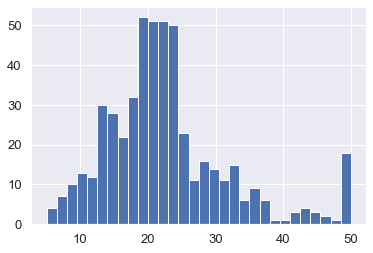

In [71]:
plt.hist(data['MEDV'], bins=30)
plt.show()

### Распределение таргета близко к нормальному.

In [72]:
data[data['MEDV'] >39].shape

(32, 14)

In [73]:
data[data['MEDV'] >49].shape

(16, 14)

In [74]:
data[data['MEDV'] >49].describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,16.000000,16.000000,16.000000,16.000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.0
mean,2.703412,19.062500,11.860625,0.375,0.566569,7.484000,77.637500,2.586087,10.625000,415.437500,16.48125,381.743125,4.355000,50.0
std,3.145228,35.129226,8.187944,0.500,0.089586,1.062342,26.934609,1.592896,9.415413,188.201654,2.88056,12.920621,2.321221,0.0
min,0.013810,0.000000,0.460000,0.000,0.401000,4.970000,24.800000,1.129600,1.000000,193.000000,13.00000,347.880000,1.730000,50.0
25%,0.409202,0.000000,3.647500,0.000,0.500000,6.932750,63.650000,1.350650,4.750000,261.750000,14.62500,375.105000,2.967500,50.0
50%,1.491190,0.000000,18.100000,0.000,0.605000,7.853000,90.200000,2.043300,5.000000,403.000000,14.70000,386.495000,3.510000,50.0
75%,5.091160,20.000000,18.470000,1.000,0.631000,8.099750,96.975000,2.970600,24.000000,666.000000,20.20000,390.925000,4.752500,50.0
max,9.232300,95.000000,19.580000,1.000,0.668000,8.725000,100.000000,5.885000,24.000000,666.000000,20.20000,395.520000,9.530000,50.0


In [75]:
data[data['MEDV'] < 15].sample(16).describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,16.000000,16.0,16.000000,16.0,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,11.802804,0.0,16.561875,0.0,0.663312,5.741437,92.193750,2.137325,18.875000,580.125000,20.006250,263.610000,22.031250,11.450000
std,8.757120,0.0,3.658864,0.0,0.084982,0.559783,8.147349,0.843720,9.200543,155.646555,1.450733,156.723639,6.113143,2.648773
min,0.047410,0.0,8.140000,0.0,0.538000,4.368000,70.600000,1.386100,1.000000,273.000000,14.700000,2.520000,7.880000,5.600000
25%,5.879970,0.0,18.100000,0.0,0.606500,5.499750,88.250000,1.622250,19.250000,600.250000,20.200000,120.677500,17.887500,10.000000
50%,9.359860,0.0,18.100000,0.0,0.679000,5.867000,95.350000,1.928250,24.000000,666.000000,20.200000,326.450000,23.085000,11.950000
75%,18.584675,0.0,18.100000,0.0,0.703250,6.123500,97.650000,2.232050,24.000000,666.000000,20.200000,396.900000,26.672500,13.425000
max,25.940600,0.0,19.580000,0.0,0.871000,6.434000,100.000000,4.454600,24.000000,666.000000,21.000000,396.900000,30.630000,14.600000


* `ZN` — доля жилой земли, зонированной для участков более 25 000 кв. — в 372 случаях = 0 (73% - от общего). Тем не менее показатель имеет значительное влияние на другие фичи, в том числе таргет.

* аналогично `CHAS`= 0 в 93% случаев, не имеет сильной корреляции с другими параметрами

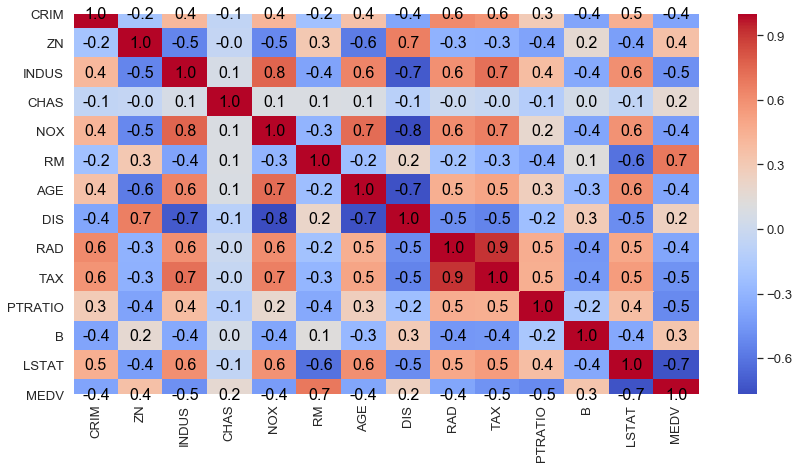

In [76]:
sns.heatmap(data.corr(),           
            cmap='coolwarm',
            annot=True,
            fmt=".1f",
            annot_kws={'size':16, 'color':'black'},
            cbar=True)
sns.set(font_scale=1.2)
fig=plt.gcf()
fig.set_size_inches(14,7)
plt.show()

* Показатель `MEDV` коррелирует с `RM` и имеет обратную корреляцию с `LSTAT`.


* `RAD` и `TAX` имеют корреляцию 0.9 (они в целом похожи). `INDUS` и `NOX` имеют корреляцию 0.8.


* Сильная обратная корреляция — `NOX` и `DIS`.


### Избавимся от `CHAS` и `RAD`

In [77]:
data = data.drop(['CHAS', 'RAD'],axis=1)

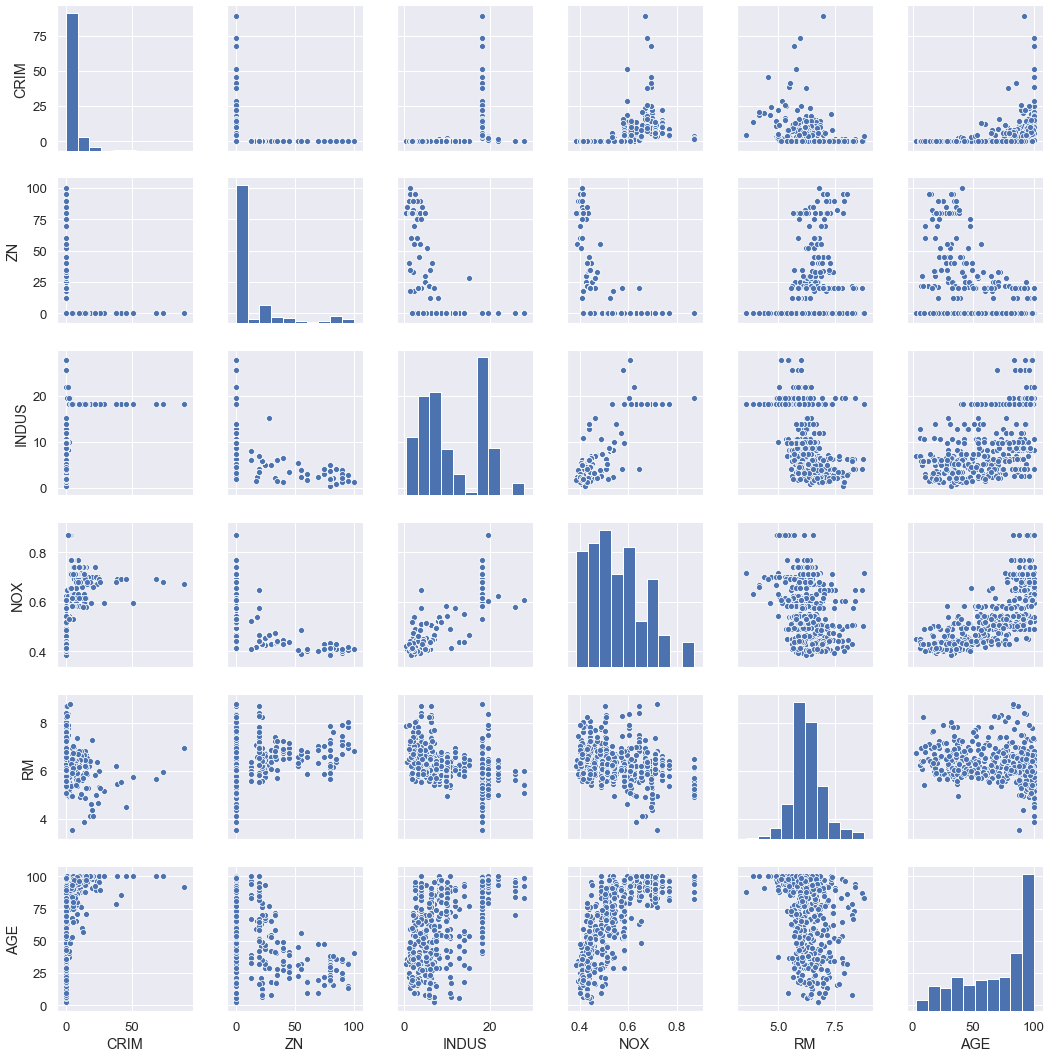

In [81]:
sns.pairplot(data.iloc[:,:6])

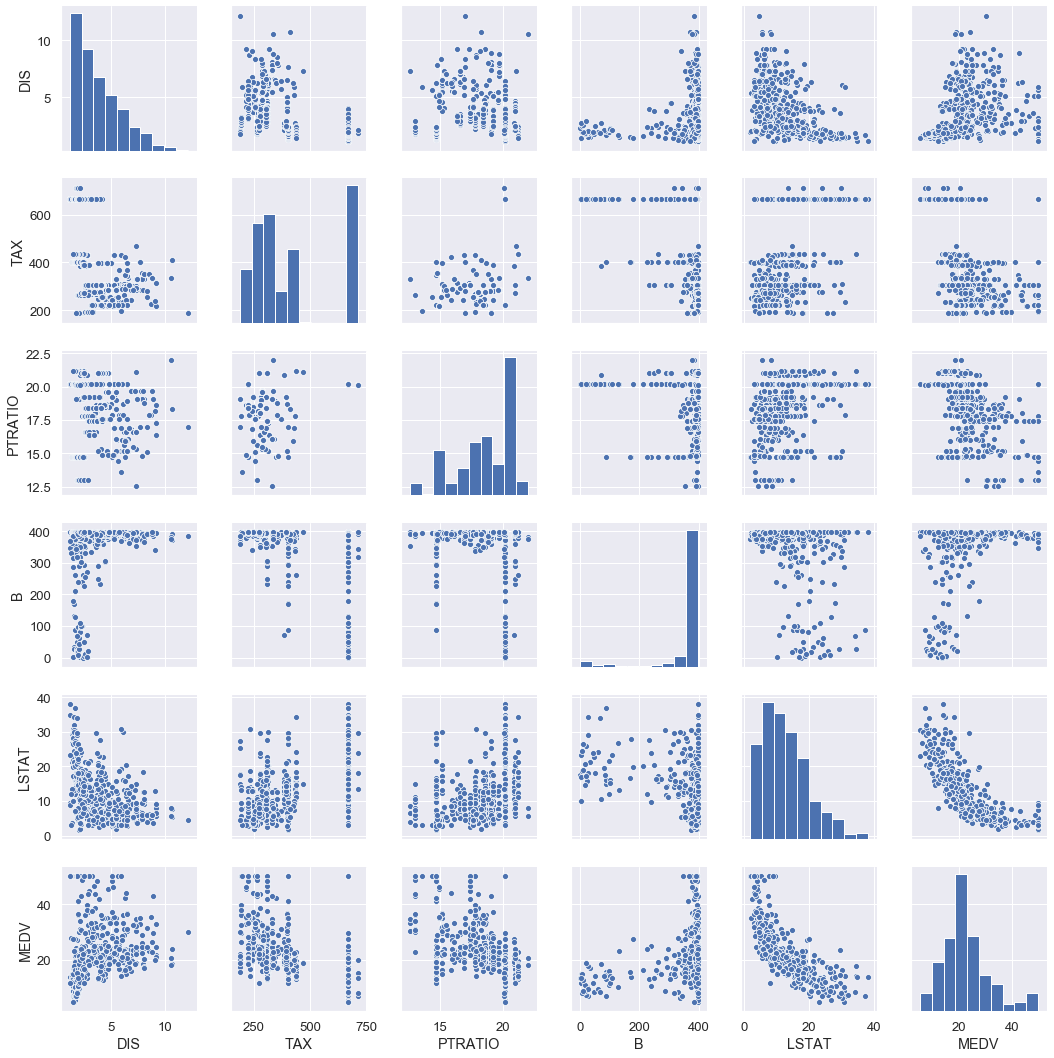

In [82]:
sns.pairplot(data.iloc[:,6:])

## Посмотрим на регрессию от одной перемнной, с наибольшей корреляцией:

In [83]:
X_rooms = data.RM
y_price = data.MEDV


X_rooms = np.array(X_rooms).reshape(-1,1)
y_price = np.array(y_price).reshape(-1,1)

print(X_rooms.shape)
print(y_price.shape)

(506, 1)
(506, 1)


In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_rooms, y_price, test_size = 0.2, random_state=5)

print(X_train_1.shape)
print(X_test_1.shape)
print(Y_train_1.shape)
print(Y_test_1.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [86]:
from sklearn.metrics import mean_squared_error

In [87]:
reg_1 = LinearRegression()
reg_1.fit(X_train_1, Y_train_1)

y_train_predict_1 = reg_1.predict(X_train_1)
rmse = (np.sqrt(mean_squared_error(Y_train_1, y_train_predict_1)))
r2 = round(reg_1.score(X_train_1, Y_train_1),2)

print("Точность на тренировочных данных")
print("--------------------------------------")
print('RMSE = {}'.format(rmse))
print('R2 = {}'.format(r2))
print("\n")

Точность на тренировочных данных
--------------------------------------
RMSE = 6.972277149440586
R2 = 0.43




### тестовые данные

In [88]:

y_pred_1 = reg_1.predict(X_test_1)
rmse = (np.sqrt(mean_squared_error(Y_test_1, y_pred_1)))
r2 = round(reg_1.score(X_test_1, Y_test_1),2)

print("Точность на тестовых данных")
print("--------------------------------------")
print('RMSE = {}'.format(rmse))
print('R2 = {}'.format(r2))
print("\n")

Точность на тестовых данных
--------------------------------------
RMSE = 4.895963186952216
R2 = 0.69




## LinearRegression по всем данным

In [89]:
X = data.drop('MEDV', axis = 1)
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

# model evaluation for training set

y_train_predict = reg_all.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = round(reg_all.score(X_train, y_train),2)

print("Точность на тренировочных данных")
print("--------------------------------------")
print('RMSE = {}'.format(rmse))
print('R2 = {}'.format(r2))
print("\n")

Точность на тренировочных данных
--------------------------------------
RMSE = 4.785916026652684
R2 = 0.74




In [90]:
y_pred = reg_all.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = round(reg_all.score(X_test, y_test),2)

print("Точность на тестовых данных")
print("--------------------------------------")
print('RMSE = {}'.format(rmse))
print('R2 = {}'.format(r2))
print("\n")

Точность на тестовых данных
--------------------------------------
RMSE = 5.203503176683092
R2 = 0.63




In [99]:
params_list = list(data.columns)[:-1]

X = data[params_list]
y = data['MEDV']


for n in range(11):
    print(params_list[n],
    '\weights: {}'.format(reg_all.coef_[n]))

    
    
print('\nBias: {}'.format(reg_all.intercept_))

pred_values = reg_all.predict(X)

print('Error: {}'.format(mean_absolute_error(pred_values, y)))

print('\nSCORE:',reg_all.score(X,y))

CRIM \weights: -0.08514385033445797
ZN \weights: 0.023392190630714776
INDUS \weights: 0.002406405543666785
NOX \weights: -14.241343105289978
RM \weights: 4.823591355434262
AGE \weights: -0.008581794901592017
DIS \weights: -1.4440470261594467
TAX \weights: 0.0006666659157171756
PTRATIO \weights: -0.8383917632940683
B \weights: 0.012206182405545761
LSTAT \weights: -0.5138554110214345

Bias: 23.495168193136575
Error: 3.3453684559682872

SCORE: 0.7187159101841292


In [100]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu